# 1. NLP_Feature_Engineering Overview
tf-idf, LDA

In [1]:
###################################!pip install --upgrade pip################# upgrade pip ###############################
#python version 3.9 will fix collections import error
#!pip install gensim --verbose
#!pip install emojis matplotlib wordcloud
#!pip install emojis

In [2]:
#!pip install pandas
#!pip install numpy
#!pip install nltk
#!pip install matplotlib
#!pip install spacy
#!pip install re
#!pip install tqdm
#!pip install collections
#!python -m spacy download en_core_web_sm
#! pip install wordcloud

In [3]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wuhangze\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wuhangze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wuhangze\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

#!python -m spacy download en_core_web_sm
import spacy

import re
from collections import Counter

from tqdm import tqdm
tqdm.pandas()

from wordcloud import WordCloud

## 2. tf-idf, LDA

In [6]:
directory_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/github_thesis/deloitte_digital_banking/tucapital_scraper/downloads/'
translated_news_save_path = "tucapital-news_with_text-translated.csv"

# modify format
# Save the combined DataFrame to a CSV file
df_copy = pd.read_csv(directory_path+translated_news_save_path)
df_copy.head()

,Unnamed: 0,title,url,date,text
0,0,"Tomorrow, last day of the account at 2.89% APR...",https://www.tucapital.es/depositos/manana-ulti...,23/04/2024,"Tomorrow, April 24, 2024, the marketing period..."
1,1,ING gives you up to €120 if you direct your pa...,https://www.tucapital.es/cuentas/ing-te-da-has...,22/04/2024,"ING now asks, in addition to direct debiting a..."
2,2,Banco BIG deposits: slight increase in normal ...,https://www.tucapital.es/depositos/depositos-d...,22/04/2024,Banco BIG remodels its deposit offer with slig...
3,3,The future of Bitcoin: predictions for the nex...,https://www.tucapital.es/blogs/guias/el-futuro...,22/04/2024,"Since its launch, Bitcoin has seen positive an..."
4,4,Eco: Cetelem only allows maximum daily transfe...,https://www.tucapital.es/blogs/eco/eco-cetelem...,19/04/2024,"Due to the disappearance of Orange Bank, and t..."


### 2. Feature Engineering Extraction

In [7]:
# Filter where Not-expected rows
date_pattern = re.compile(r'-\d{2}/\d{2}/\d{4}:')
df_cleaned = df_copy[~df_copy['title'].str.contains(date_pattern)]
# Drop nan
df_cleaned = df_cleaned.dropna(subset=['title', 'url', 'date'])

df_copy.shape, df_cleaned.shape

((1025, 5), (1018, 5))

In [8]:
df_cleaned['combined_text'] = (df_cleaned['title'] + ' ') * 3 + df_cleaned['text']

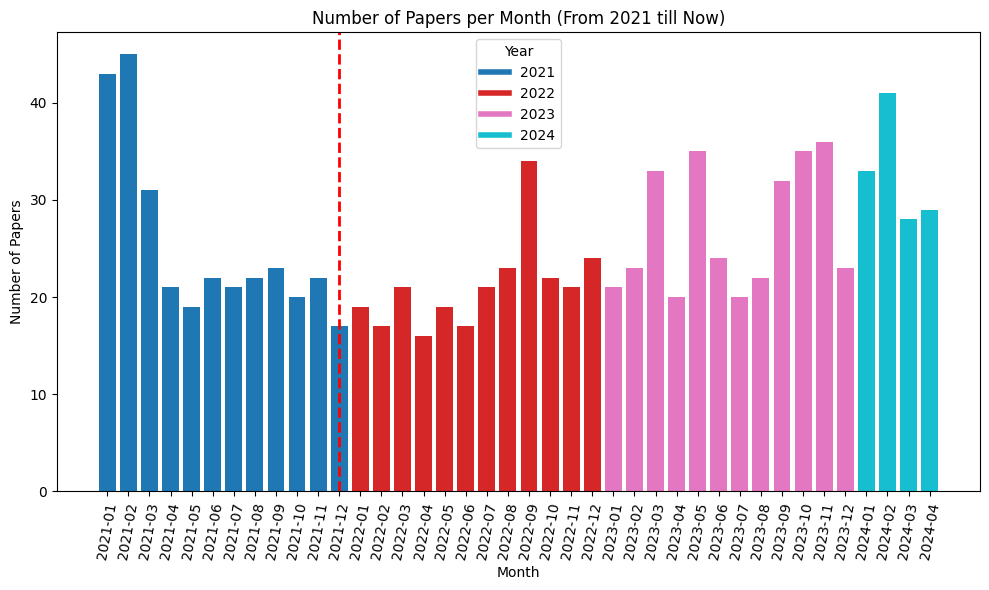

In [9]:
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the DataFrame to only include dates from 2021 to now
df_filtered = df_cleaned[(df_cleaned['date'] >= '2021-01-01') & (df_cleaned['date'] <= pd.Timestamp.today())]

# Group by month and count entries
df_grouped = df_filtered.groupby(pd.Grouper(key='date', freq='M')).size()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Assign colors to each year
years = df_grouped.index.year
unique_years = years.unique()
colors = plt.cm.get_cmap('tab10', len(unique_years))

# Plot each bar with the corresponding color
bars = []
for i, (date, count) in enumerate(df_grouped.items()):
    color = colors(unique_years.tolist().index(date.year))
    bars.append(ax.bar(i, count, color=color))

# Set x-ticks
ax.set_xticks(range(len(df_grouped)))
ax.set_xticklabels([date.strftime('%Y-%m') for date in df_grouped.index], rotation=80)

# Create a custom legend
handles = [plt.Line2D([0], [0], color=colors(i), lw=4) for i in range(len(unique_years))]
labels = unique_years
ax.legend(handles, labels, title='Year')

# Add vertical line for December 2021
start_month_index = df_grouped.index.get_loc('2021-12-31')
ax.axvline(x=start_month_index, color='red', linestyle='--', linewidth=2, label='Start of Web Traffic Data')

# Title and labels
ax.set_title('Number of Papers per Month (From 2021 till Now)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Papers')

plt.tight_layout()  # Adjust layout to make room for label rotation

# Show the plot
plt.show()


In [10]:
# Ensure 'combined_text' column is in the DataFrame
df_cleaned['combined_text'] = df_cleaned['combined_text'].astype(str)  # Convert to string in case it's not

# Count the number of words in each entry
df_cleaned['word_count'] = df_cleaned['combined_text'].apply(lambda x: len(x.split()))

# Verify the word counts
df_cleaned.head()

,Unnamed: 0,title,url,date,text,combined_text,word_count
0,0,"Tomorrow, last day of the account at 2.89% APR...",https://www.tucapital.es/depositos/manana-ulti...,2024-04-23,"Tomorrow, April 24, 2024, the marketing period...","Tomorrow, last day of the account at 2.89% APR...",318
1,1,ING gives you up to €120 if you direct your pa...,https://www.tucapital.es/cuentas/ing-te-da-has...,2024-04-22,"ING now asks, in addition to direct debiting a...",ING gives you up to €120 if you direct your pa...,400
2,2,Banco BIG deposits: slight increase in normal ...,https://www.tucapital.es/depositos/depositos-d...,2024-04-22,Banco BIG remodels its deposit offer with slig...,Banco BIG deposits: slight increase in normal ...,476
3,3,The future of Bitcoin: predictions for the nex...,https://www.tucapital.es/blogs/guias/el-futuro...,2024-04-22,"Since its launch, Bitcoin has seen positive an...",The future of Bitcoin: predictions for the nex...,656
4,4,Eco: Cetelem only allows maximum daily transfe...,https://www.tucapital.es/blogs/eco/eco-cetelem...,2024-04-19,"Due to the disappearance of Orange Bank, and t...",Eco: Cetelem only allows maximum daily transfe...,450


In [11]:
# Convert the 'date' column to datetime if not already
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the DataFrame to only include dates from 2021 to now
df_filtered = df_cleaned[(df_cleaned['date'] >= '2021-01-01') & (df_cleaned['date'] <= pd.Timestamp.today())]

# Group by month and sum the word counts
df_grouped_words = df_filtered.groupby(pd.Grouper(key='date', freq='M'))['word_count'].sum()

# Verify the grouped data
df_grouped_words.head()

date
2021-01-31    25283
2021-02-28    26524
2021-03-31    17448
2021-04-30    11207
2021-05-31     9619
Freq: ME, Name: word_count, dtype: int64

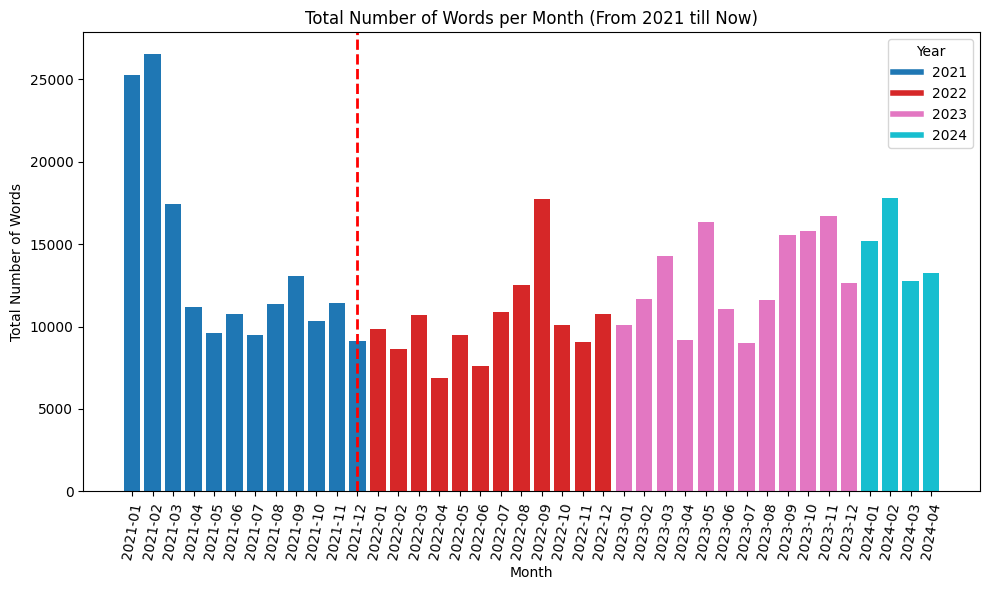

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

# Assign colors to each year
years = df_grouped_words.index.year
unique_years = years.unique()
colors = plt.cm.get_cmap('tab10', len(unique_years))

# Plot each bar with the corresponding color
bars = []
for i, (date, count) in enumerate(df_grouped_words.items()):
    color = colors(unique_years.tolist().index(date.year))
    bars.append(ax.bar(i, count, color=color))

# Set x-ticks
ax.set_xticks(range(len(df_grouped_words)))
ax.set_xticklabels([date.strftime('%Y-%m') for date in df_grouped_words.index], rotation=80)

# Create a custom legend
handles = [plt.Line2D([0], [0], color=colors(i), lw=4) for i in range(len(unique_years))]
labels = unique_years
ax.legend(handles, labels, title='Year')

# Add vertical line for December 2021
start_month_index = df_grouped_words.index.get_loc('2021-12-31')
ax.axvline(x=start_month_index, color='red', linestyle='--', linewidth=2, label='Start of Web Traffic Data')

# Title and labels
ax.set_title('Total Number of Words per Month (From 2021 till Now)')
ax.set_xlabel('Month')
ax.set_ylabel('Total Number of Words')

plt.tight_layout()  # Adjust layout to make room for label rotation

# Show the plot
plt.show()

In [13]:
# Convert the 'date' column to datetime if not already
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the DataFrame to only include dates from 2021 to now
df_filtered = df_cleaned[(df_cleaned['date'] >= '2021-01-01') & (df_cleaned['date'] <= pd.Timestamp.today())]

# Group by month and calculate the average word count
df_grouped_avg_words = df_filtered.groupby(pd.Grouper(key='date', freq='M'))['word_count'].mean()

# Verify the grouped data
df_grouped_avg_words.head()


date
2021-01-31    587.976744
2021-02-28    589.422222
2021-03-31    562.838710
2021-04-30    533.666667
2021-05-31    506.263158
Freq: ME, Name: word_count, dtype: float64

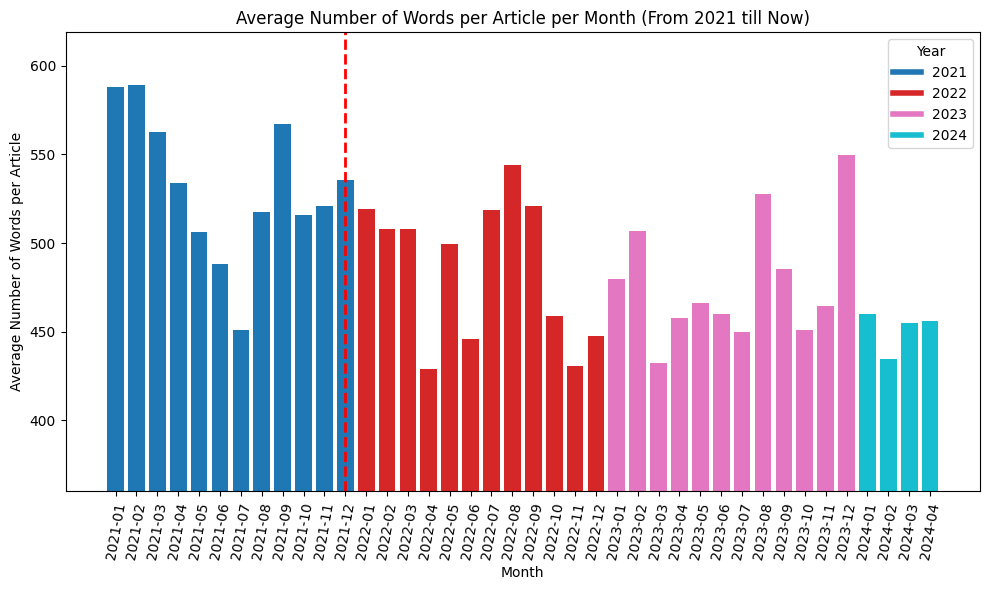

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

# Assign colors to each year
years = df_grouped_avg_words.index.year
unique_years = years.unique()
colors = plt.cm.get_cmap('tab10', len(unique_years))

# Plot each bar with the corresponding color
bars = []
for i, (date, count) in enumerate(df_grouped_avg_words.items()):
    color = colors(unique_years.tolist().index(date.year))
    bars.append(ax.bar(i, count, color=color))

# Set x-ticks
ax.set_xticks(range(len(df_grouped_avg_words)))
ax.set_xticklabels([date.strftime('%Y-%m') for date in df_grouped_avg_words.index], rotation=80)

# Create a custom legend
handles = [plt.Line2D([0], [0], color=colors(i), lw=4) for i in range(len(unique_years))]
labels = unique_years
ax.legend(handles, labels, title='Year')

# Add vertical line for December 2021
start_month_index = df_grouped_avg_words.index.get_loc('2021-12-31')
ax.axvline(x=start_month_index, color='red', linestyle='--', linewidth=2, label='Start of Web Traffic Data')

# Title and labels
ax.set_title('Average Number of Words per Article per Month (From 2021 till Now)')
ax.set_xlabel('Month')
ax.set_ylabel('Average Number of Words per Article')

# Set y-axis limit to start from 300
ax.set_ylim(360, ax.get_ylim()[1])

plt.tight_layout()  # Adjust layout to make room for label rotation

# Show the plot
plt.show()


#### TF-IDF

#### Tokenizer

In [15]:
#### nlp component setting #####
porter = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))
# Load spaCy model
sp = spacy.load('en_core_web_sm')

mod = 1

def remove_digits(token):
    # Use regex to remove digits
    token_without_digits = re.sub(r'\d+', '', token)
    return token_without_digits

def abbr_or_lower(word):
    if re.match('([A-Z]+[a-z]*){5,}', word):
        return word
    else:
        return word.lower()
    
def tokenize(text, modulation):
    # Define regex for emojis and "!"
    emoji_exclam_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251!]')
    
    tokens = []

    cleaned_text = emoji_exclam_pattern.sub(r'', text)
    if modulation < 3:
        for token in re.split(r'\W+', cleaned_text):
            token = remove_digits(token) # remove number
            if token is '': continue
            token = abbr_or_lower(token)
            if token and re.search('[a-zA-Z]', token):
                if modulation == 0:
                    tokens.append(token)
                elif modulation == 1 and token not in stop_words: # remove stop words
                    tokens.append(token)
                elif modulation == 2 and token not in stop_words and porter: # remove stop words + stem
                    tokens.append(porter.stem(token))
        
        # Handle emojis and "!" separately to avoid removing them
        emoji_exclam_tokens = emoji_exclam_pattern.findall(text)
        for token in emoji_exclam_tokens:
            if token == '!':
                tokens.append(token)
            elif modulation < 2 and token in stop_words:
                continue  # If an emoji is somehow in stop_words, skip it
            else:
                tokens.append(token)
        
    else:
        # Handling for modulation >= 2, potentially using spaCy or other logic
        pass  # Implement as necessary
    
    return tokens

def custom_tokenizer(text):
    tokens = tokenize(text, modulation=mod)
    return tokens

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer,ngram_range=(1, 3), max_df=0.6, min_df=0.005)

# Fit and transform the cleaned text data
tfidf_features = tfidf_vectorizer.fit_transform(df_cleaned['combined_text'])

# Convert to dense matrix (if needed)
tfidf_features_dense = tfidf_features.toarray()

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

In [17]:
import numpy as np

# Sum tf-idf scores for each term
term_scores = np.sum(tfidf_features_dense, axis=0)

# Create a dictionary to store terms and their scores
term_score_dict = {term: score for term, score in zip(feature_names, term_scores)}

# Sort terms by their scores in descending order
sorted_terms = sorted(term_score_dict.items(), key=lambda x: x[1], reverse=True)

print("Top 20: ")
# Print the top 100 terms with their scores
for term, score in sorted_terms[:20]:
    print(f"{term}: {score}")


print("\n\nLast 20: ")
# Print the top 100 terms with their scores
for term, score in sorted_terms[-20:]:
    print(f"{term}: {score}")
print("\n\nLength of terms: ",len(term_score_dict))

Top 20: 
deposits: 41.917330587825326
orange: 36.959203088521825
payroll: 36.283509288991176
orange bank: 31.18166427464491
ing: 29.367009020319784
banco: 27.82030431637759
money: 26.224458245480083
renault: 21.979452752191023
renault bank: 21.957361279939967
account apr: 21.894604306546654
term: 21.800400744509734
commissions: 21.217247140586732
wizink: 19.162220671205073
online: 18.99123278133433
deposit apr: 18.823326762683745
year: 18.656687351191323
sabadell: 17.199003597930595
customers: 17.161500879814838
savings: 16.390732816841147
interest: 16.284782857153466


Last 20: 
allow go: 0.22487697771076684
offers checking: 0.22381285457185576
offers checking account: 0.22381285457185576
income self: 0.22318584030523753
income self employed: 0.22318584030523753
free direct: 0.22285526587668877
atm world: 0.2224913379648792
atms withdraw money: 0.2224913379648792
without fees: 0.22030460303127666
one main: 0.2195162629787053
advantages addition: 0.21853984387963626
great advantages: 0

#### 'bank' related terms

In [18]:
import re

patterns = [
    re.compile(r'\b\w+(bank|banco)\w+\b'),                 # Single gram concatenated terms containing "bank" or "banco"
    re.compile(r'\b\w+\s+(bank|banco)\b'),                 # Bigram pattern: ... bank or banco
    re.compile(r'\b(bank|banco)\s+\w+\b'),                 # Bigram pattern: bank or banco ...
    re.compile(r'\b\w+\s+(bank|banco)\s+\w+\b'),           # Trigram pattern: ... bank or banco ...
    re.compile(r'\b(bank|banco)\s+\w+\s+\w+\b'),           # Trigram pattern: bank or banco ... ...
    re.compile(r'\b\w+\s+\w+\s+(bank|banco)\b')            # Trigram pattern: ... ... bank or banco
]


# Dictionary to hold filtered terms
filtered_terms = {}

# Check each term in the dictionary
for term, score in term_score_dict.items():
    # Ensure "bank" or "banco" is standalone
    if any(pattern.match(term) for pattern in patterns) and ('bank' in term.split() or 'banco' in term.split()):
        if score >= 1:
            filtered_terms[term] = score

# Sort the filtered terms by score in descending order
sorted_terms = sorted(filtered_terms.items(), key=lambda x: x[1], reverse=True)
# Print the filtered terms and their scores
for term, score in sorted_terms:
    print(f"Term: {term}, TF-IDF Score: {score:.4f}")

print("\n\nLength of terms: ",len(sorted_terms))

Term: orange bank, TF-IDF Score: 31.1817
Term: renault bank, TF-IDF Score: 21.9574
Term: banco big, TF-IDF Score: 10.2637
Term: bank account, TF-IDF Score: 9.4996
Term: orange bank account, TF-IDF Score: 8.3799
Term: banco sabadell, TF-IDF Score: 8.1938
Term: evo banco, TF-IDF Score: 8.1719
Term: bank either, TF-IDF Score: 7.6710
Term: orange bank either, TF-IDF Score: 7.6076
Term: anyone orange bank, TF-IDF Score: 7.5992
Term: bank account know, TF-IDF Score: 7.5992
Term: bank either atms, TF-IDF Score: 7.5992
Term: surpasses orange bank, TF-IDF Score: 7.5992
Term: ebn banco, TF-IDF Score: 7.2154
Term: apr renault bank, TF-IDF Score: 6.3877
Term: deutsche bank, TF-IDF Score: 5.9212
Term: bank ends, TF-IDF Score: 5.6252
Term: renault bank ends, TF-IDF Score: 5.6252
Term: banco santander, TF-IDF Score: 5.5515
Term: bank increases, TF-IDF Score: 5.2332
Term: apr banco, TF-IDF Score: 5.1096
Term: haitong bank, TF-IDF Score: 4.8312
Term: nn bank, TF-IDF Score: 4.8188
Term: bank offers, TF-

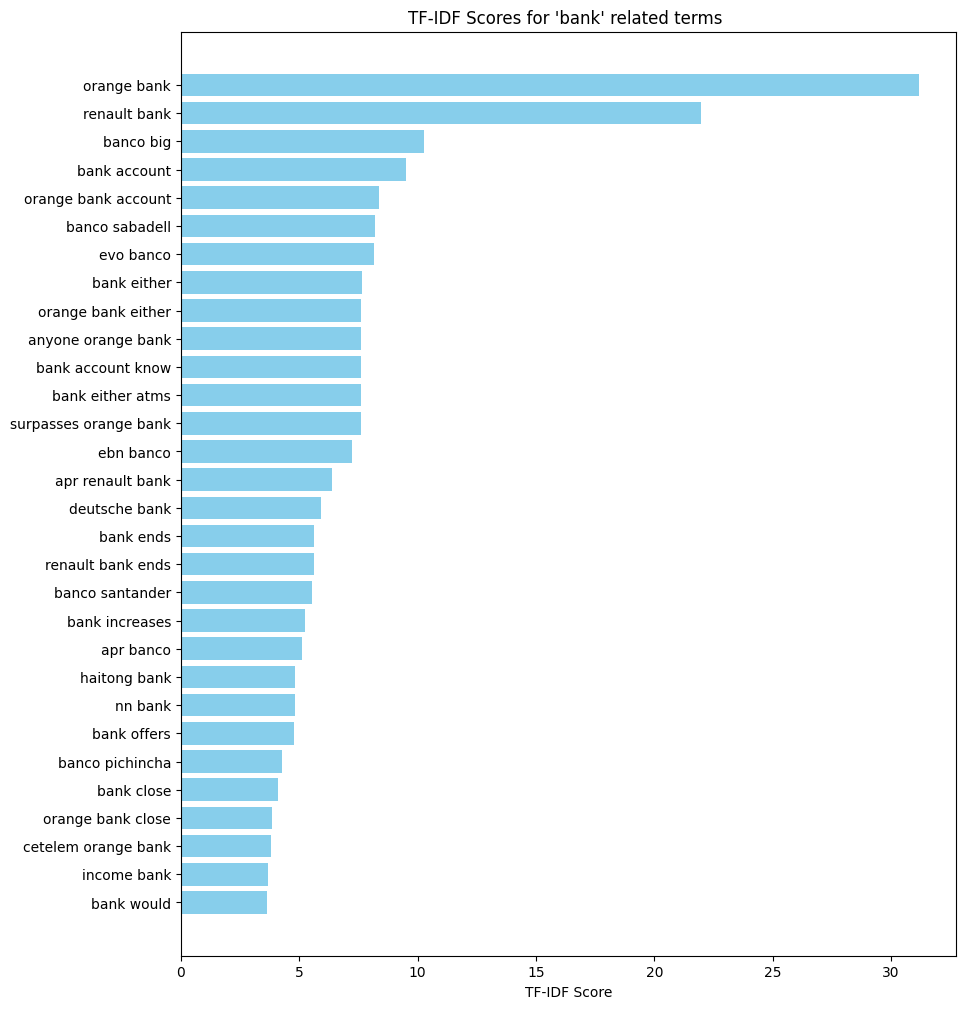

In [19]:
plot_sorted_terms = sorted_terms[:30]
terms, scores = zip(*plot_sorted_terms)

plt.figure(figsize=(10, 12))
plt.barh(terms, scores, color='skyblue')
plt.xlabel('TF-IDF Score')
plt.title('TF-IDF Scores for \'bank\' related terms ')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest scores at the top
plt.show()

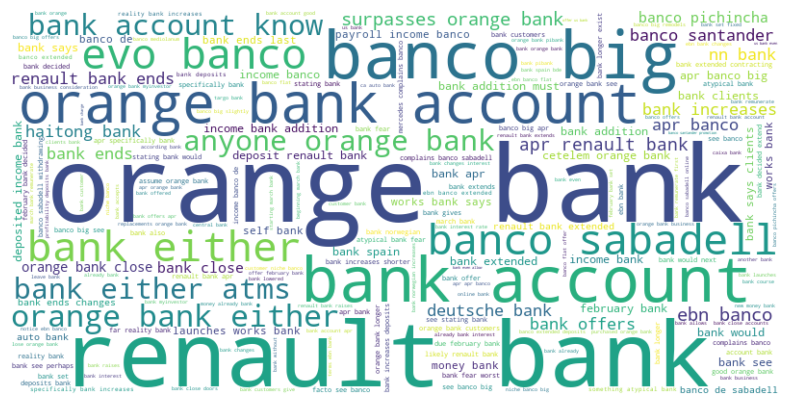

In [20]:
# Converting sorted_terms back to a dictionary
filtered_term_score_dict = dict(sorted_terms)
# Generate the word cloud
wordcloud = WordCloud(
    width = 800, 
    height = 400, 
    background_color = 'white'
).generate_from_frequencies(filtered_term_score_dict)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  # 'bilinear' for smoother appearance
plt.axis('off')  # No axis to be shown
plt.show()

Total terms before filtering: 13362
Total terms after filtering: 12415


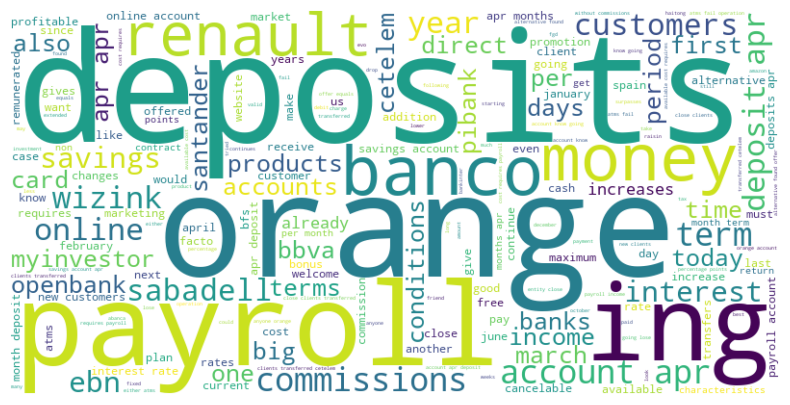

In [21]:
not_bank_filtered_terms = {}

# Check each term in the dictionary
for term, score in term_score_dict.items():
    if not(any(pattern.search(term) for pattern in patterns)):
        not_bank_filtered_terms[term] = score

# Print the number of terms before and after filtering
print(f"Total terms before filtering: {len(term_score_dict)}")
print(f"Total terms after filtering: {len(not_bank_filtered_terms)}")

# Sort the filtered terms by score in descending order
not_bank_sorted_terms = sorted(not_bank_filtered_terms.items(), key=lambda x: x[1], reverse=True)

# Generate the word cloud if there are any terms left after filtering
if not_bank_sorted_terms:
    plot_term_score_dict = dict(not_bank_sorted_terms)
    # Generate the word cloud
    wordcloud = WordCloud(
        width = 800, 
        height = 400, 
        background_color = 'white'
    ).generate_from_frequencies(plot_term_score_dict)

    # Displaying the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')  # 'bilinear' for smoother appearance
    plt.axis('off')  # No axis to be shown
    plt.show()
else:
    print("No terms available to generate a word cloud.")

#### LDA - topic modelling

In [22]:
'''from collections.abc import Mapping
from gensim import corpora, models
import pprint
'''

'from collections.abc import Mapping\nfrom gensim import corpora, models\nimport pprint\n'

In [23]:
'''#!pip install gensim
!pip install --use-pep517 gensim==3.8.0'''

'#!pip install gensim\n!pip install --use-pep517 gensim==3.8.0'

In [24]:
def tokenizer_for_df(text, mod = 0):
    tokens = tokenize(text, mod)
    return " ".join(tokens)

def load_bar(corpus_data, col, mod = 0):
    # Percentage load bar
    text_preproc = corpus_data[col].astype(str).progress_apply(lambda row: tokenizer_for_df(row, mod))
    corpus_data[col] = text_preproc
    print(f'done with column: {col}')


def tokenizer_for_df_fit(corpus_data, mod = 0):
    # Load with bar and requires a mod value
    load_bar(corpus_data, "combined_text", mod)

    corpus_data = corpus_data.dropna(subset=["combined_text"]).reset_index(drop=True)
    corpus_data = corpus_data[["title", "url", "date", "text", "combined_text", "word_count"]]

    return corpus_data

In [25]:
df_copy = df_cleaned
df_copy = tokenizer_for_df_fit(df_copy,mod = 1)

df_copy.head()

100%|██████████| 1018/1018 [00:01<00:00, 628.88it/s]

done with column: combined_text


,title,url,date,text,combined_text,word_count
0,"Tomorrow, last day of the account at 2.89% APR...",https://www.tucapital.es/depositos/manana-ulti...,2024-04-23,"Tomorrow, April 24, 2024, the marketing period...",tomorrow last day account apr deposit apr rena...,318
1,ING gives you up to €120 if you direct your pa...,https://www.tucapital.es/cuentas/ing-te-da-has...,2024-04-22,"ING now asks, in addition to direct debiting a...",ing gives direct payroll pay card ing gives di...,400
2,Banco BIG deposits: slight increase in normal ...,https://www.tucapital.es/depositos/depositos-d...,2024-04-22,Banco BIG remodels its deposit offer with slig...,banco big deposits slight increase normal comb...,476
3,The future of Bitcoin: predictions for the nex...,https://www.tucapital.es/blogs/guias/el-futuro...,2024-04-22,"Since its launch, Bitcoin has seen positive an...",future bitcoin predictions next years future b...,656
4,Eco: Cetelem only allows maximum daily transfe...,https://www.tucapital.es/blogs/eco/eco-cetelem...,2024-04-19,"Due to the disappearance of Orange Bank, and t...",eco cetelem allows maximum daily transfers eco...,450
